# 7. 클리닝

두 번째로 해보는 동적계획법 코딩 문제입니다. 저번 과제와 달리 상황이 조금 복잡해서 난이도가 더 있는 편이었습니다. 다행히 동적계획법으로 풀면 된다는 걸 알아서 쉽게 풀었던 것 같습니다.

## 문제

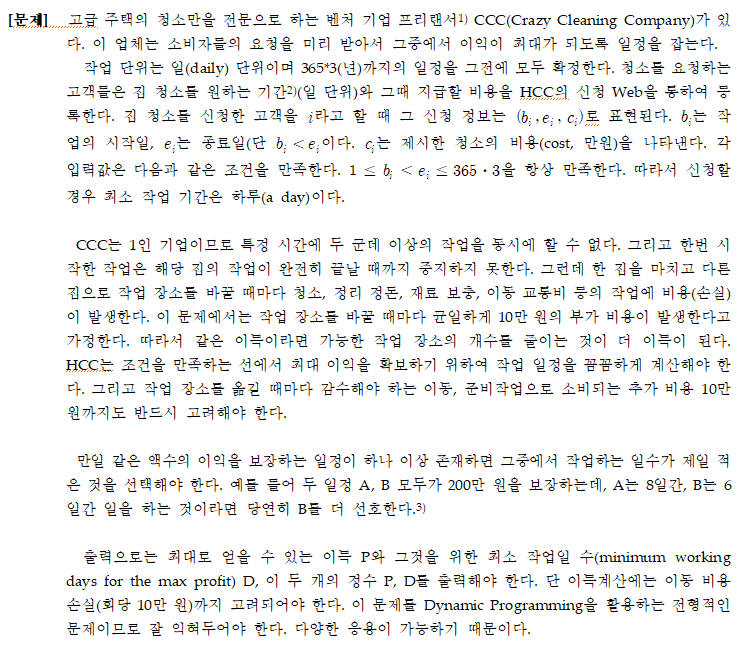

## 입출력

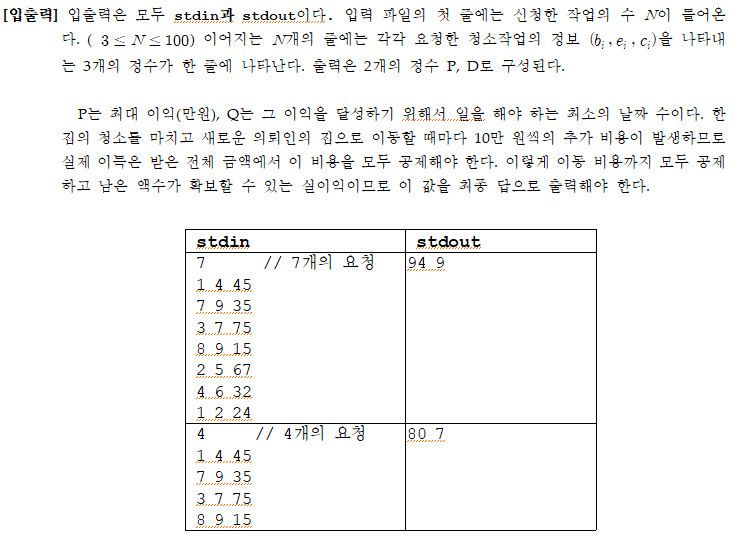

## 기본 세팅

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True) # gdrive 수정 가능하게 함

Mounted at /content/drive/


In [2]:
# 수정
add = "_7_클리닝(동적계획법)/"

PROJECT_DIR = "/content/drive/MyDrive/2022년/1학기/Computer_Algorithm/과제 파일/" + add

def inp_pth(i):
  return PROJECT_DIR + 'sample/0' + str(i) + '.inp'

def out_pth(i):
  return PROJECT_DIR + 'sample/0' + str(i) + '.out'

In [58]:
def test(class_):
  for i in range(1, 6):
    print(f"[{i}]")
    inp_path = inp_pth(i)
    with open(inp_path, 'r') as inp:
      input = inp.readlines()
    
    out_path = out_pth(i)
    with open(out_path) as out:
      answer = out.read()
    
    for _, input_ in enumerate(input[1:]):
      class_.input(arr = input_)
    
    result = class_.out()
    print(f"{result == answer}\n result: {result} answer: {answer}")
    class_.reset()


## 풀이

n 번째 날에 가장 돈을 많이 벌 수 있는 계획을 $P(n)$이라고 합시다.

이때 $P(n+1)$은 두 가지 경우로 나뉩니다.  
1) n+1 번째 날에 일을 안 하는 경우 => $P(n)$  
2) i 번째 날부터 n+1 번째 날까지 일해야 하는 어떤 일을 하는 경우 => $P(i-1)$ + 새로운 일로 받는 돈

따라서 처음부터 순차적으로 위의 경우의 수 중 최대가 되는 값으로 $P(n)$을 채워나가면 문제가 해결이 됩니다.

In [59]:
class Job:
  def __init__(self, arr):
    self.start = int(arr[0])
    self.end = int(arr[1])
    self.pay = int(arr[2])
    self.days = self.end - self.start + 1
  
  def isIn(self, n):
    return n == self.end

  def __str__(self):
    return f"{self.start} {self.end} {self.pay}"

In [60]:
class Plan:
  def __init__(self):
    self.tot_pay = 0
    self.tot_days = 0
    self.first = 0
  
  def copy(self, another):
    self.tot_pay = another.tot_pay
    self.tot_days = another.tot_days


  def add_job(self, job):
    self.tot_pay += job.pay + (1-self.first) * -10
    self.tot_days += job.days


  def __lt__(self, another):
    if self.tot_pay < another.tot_pay:
      return True
    elif self.tot_pay == another.tot_pay:
      if self.tot_days > another.tot_days:
        return True
      # if self.tot_days > another.tot_days:
      #   return True
      # else:
      #   return False
    return False

  def __str__(self):
    return f"{self.tot_pay} {self.tot_days}"

In [61]:
class Cleaning:
  def __init__(self):
    self.plans = []
    self.jobs = []
    self.max = 0
    self.first = True
    self.iter = 1


  def input(self, arr):
    split = arr.split()
    self.jobs.append(Job(split))
    if self.max < int(split[1]):
      self.max = int(split[1])
    

  def add_plan(self):
    best_plan = Plan()

    for job in self.jobs:
      if job.isIn(self.iter):
        if job.start == 1:
          tmp = Plan()
          tmp.first = 1
        else:
          tmp = Plan()
          tmp.copy(self.plans[job.start - 2])

          if tmp.tot_pay == 0 :
            tmp.first = 1
        
        # print(f"{self.iter} : {tmp} / {job}")
        tmp.add_job(job)
        # print(f"->{tmp}")
        
        if best_plan < tmp:
          best_plan = tmp

    if self.iter != 1:
      if best_plan < self.plans[self.iter - 2]:
          best_plan = self.plans[self.iter - 2]
      # print(f"{self.iter} :  {best_plan} {self.plans[self.iter - 2]} {best_plan < self.plans[self.iter - 2]}")

    self.plans.append(best_plan)
    self.iter += 1


  def create_plan(self):
    for i in range(self.max):
      self.add_plan()
    

  def out(self):
    self.create_plan()
    return str(self.plans[-1])

  def reset(self):
    self.plans = []
    self.jobs = []
    self.max = 0
    self.first = True
    self.iter = 1
  

In [62]:
test(Cleaning())

[1]
False
 result: 94 9 answer: 
[2]
True
 result: 80 7 answer: 80 7
[3]
True
 result: 100 5 answer: 100 5
[4]
True
 result: 90 4 answer: 90 4
[5]
True
 result: 160 5 answer: 160 5


## 최종 제출 파일

In [64]:
class Job:
  def __init__(self, arr):
    self.start = int(arr[0])
    self.end = int(arr[1])
    self.pay = int(arr[2])
    self.days = self.end - self.start + 1
  
  def isIn(self, n):
    return n == self.end

  def __str__(self):
    return f"{self.start} {self.end} {self.pay}"

class Plan:
  def __init__(self):
    self.tot_pay = 0
    self.tot_days = 0
    self.first = 0
  
  def copy(self, another):
    self.tot_pay = another.tot_pay
    self.tot_days = another.tot_days


  def add_job(self, job):
    self.tot_pay += job.pay + (1-self.first) * -10
    self.tot_days += job.days


  def __lt__(self, another):
    if self.tot_pay < another.tot_pay:
      return True
    elif self.tot_pay == another.tot_pay:
      if self.tot_days > another.tot_days:
        return True
      # if self.tot_days > another.tot_days:
      #   return True
      # else:
      #   return False
    return False

  def __str__(self):
    return f"{self.tot_pay} {self.tot_days}"


class Cleaning:
  def __init__(self):
    self.plans = []
    self.jobs = []
    self.max = 0
    self.first = True
    self.iter = 1


  def input(self, arr):
    split = arr.split()
    self.jobs.append(Job(split))
    if self.max < int(split[1]):
      self.max = int(split[1])
    

  def add_plan(self):
    best_plan = Plan()

    for job in self.jobs:
      if job.isIn(self.iter):
        if job.start == 1:
          tmp = Plan()
          tmp.first = 1
        else:
          tmp = Plan()
          tmp.copy(self.plans[job.start - 2])

          if tmp.tot_pay == 0 :
            tmp.first = 1
        
        # print(f"{self.iter} : {tmp} / {job}")
        tmp.add_job(job)
        # print(f"->{tmp}")
        
        if best_plan < tmp:
          best_plan = tmp

    if self.iter != 1:
      if best_plan < self.plans[self.iter - 2]:
          best_plan = self.plans[self.iter - 2]
      # print(f"{self.iter} :  {best_plan} {self.plans[self.iter - 2]} {best_plan < self.plans[self.iter - 2]}")

    self.plans.append(best_plan)
    self.iter += 1


  def create_plan(self):
    for i in range(self.max):
      self.add_plan()
    

  def out(self):
    self.create_plan()
    return str(self.plans[-1])

  def reset(self):
    self.plans = []
    self.jobs = []
    self.max = 0
    self.first = True
    self.iter = 1
  

cleaning = Cleaning()
num = int(input())
for i in range(num):
  cleaning.input(input())

print(cleaning.out())


7
1 4 45
7 9 35
3 7 75
8 9 15
2 5 67
4 6 32
1 2 24
94 9


## 결과

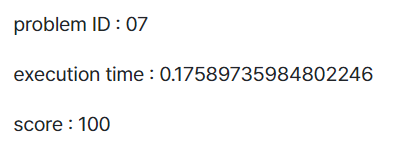